# Fase 3.0: Generar gráficas de los resultados

In [1]:
# Imports

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np

## 1. Generar gráficas para OA, AA y tiempo de inferencia de la CNN

In [2]:
# Datos iniciales

model_names_cnn = [
    "base_laptop",
    "base_rpi",
    "onnx_laptop",
    "onnx_rpi",
    "o-100_c0",
    "o0_c0",
    "o1_c0",
    "o2_c0",
    "o4_c0",
    "o4_c1",
]

color_map = {
    "base": "#FFA07A", # Color salmón
    "onnx": "#87CEFA", # Color azul cielo
    "opt": "#90EE90" # Color verde claro
}

# Asignar colores a cada modelo según su prefijo
bar_colors = []
for name in model_names_cnn:
    if name.startswith("base"):
        bar_colors.append(color_map["base"])
    elif name.startswith("onnx"):
        bar_colors.append(color_map["onnx"])
    else:
        bar_colors.append(color_map["opt"])
        
legend_elements = [
    Patch(facecolor=color_map["base"], label="Base PyTorch (No optimization)"),
    Patch(facecolor=color_map["onnx"], label="ONNX (No optimization)"),
    Patch(facecolor=color_map["opt"], label="Optimization + Compression (oX_cY)")
]

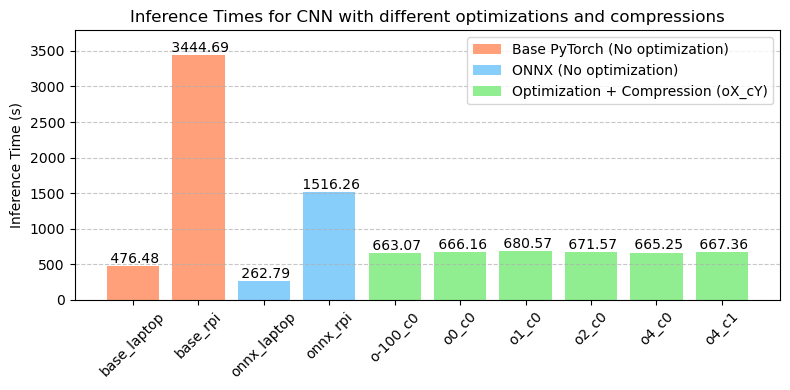

In [3]:
# Graficar los tiempos de inferencia
inference_times = [
    476.4813,
    3444.6941,
    262.7909,
    1516.2593,
    663.0664,
    666.1553,
    680.5718,
    671.5710,
    665.2532,
    667.3588
]

plt.figure(figsize=(8, 4))
bars = plt.bar(model_names_cnn, inference_times, color=bar_colors)

# Añadimos valores encima de las barras
for bar, value in zip(bars, inference_times):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 2,
             f'{value: .2f}',
             ha='center', va='bottom', fontsize=10)

plt.ylim(top=max(inference_times) * 1.1)
plt.ylabel("Inference Time (s)")
plt.title("Inference Times for CNN with different optimizations and compressions")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadimos leyenda y texto explicativo
plt.legend(handles = legend_elements, loc='upper right', frameon=True)
# plt.text(0.5, -0.5, explanation, ha='center', va='center', fontsize=9, transform=plt.gca().transAxes)
plt.tight_layout()

# Guardar y mostrar la imagen
plt.savefig("../results/graphs/inference_times_cnn21.png")
plt.savefig("../results/graphs/inference_times_cnn21.pdf", dpi=300)
plt.show()

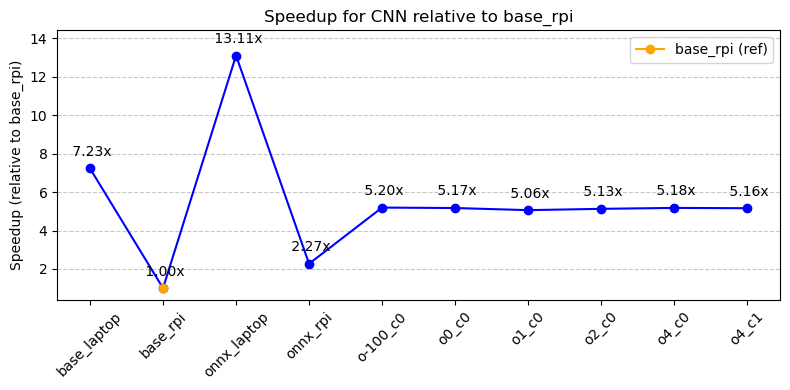

In [4]:
# Graficar el speedup
base_rpi_idx = model_names_cnn.index("base_rpi")
base_rpi_time = inference_times[base_rpi_idx]
speedup = [base_rpi_time / t for t in inference_times]

plt.figure(figsize=(8, 4))
plt.plot(model_names_cnn, speedup, marker='o', linestyle='-', color='blue')

# Resaltar el punto rpi_base con otro color
plt.plot(model_names_cnn[base_rpi_idx], speedup[base_rpi_idx], marker='o', color='orange', label='base_rpi (ref)')

# Añadimos valores encima de las barras
for x, y in zip(model_names_cnn, speedup):
    plt.text(x,
             y + 0.5,
             f'{y: .2f}x',
             ha='center', va='bottom', fontsize=10)

plt.ylim(top=max(speedup) * 1.1)
plt.ylabel("Speedup (relative to base_rpi)")
plt.title("Speedup for CNN relative to base_rpi")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Guardar y mostrar la imagen
plt.savefig("../results/graphs/speedup_cnn21.png")
plt.savefig("../results/graphs/speedup_cnn21.pdf", dpi=300)
plt.show()

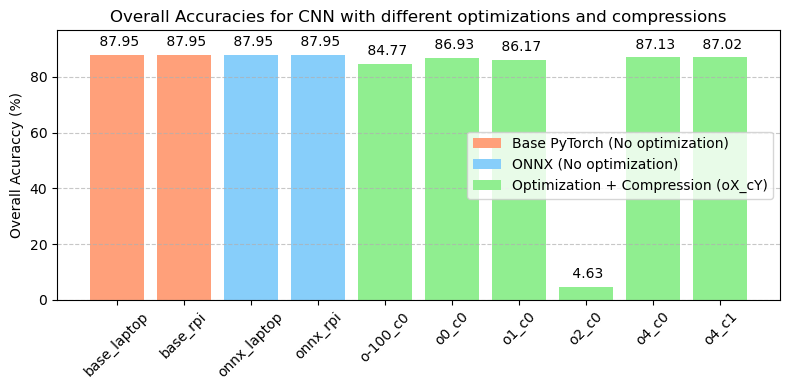

In [5]:
# Graficar los OA
oa_values = [
    87.95,
    87.95,
    87.95,
    87.95,
    84.77,
    86.93,
    86.17,
    4.63,
    87.13,
    87.02
]

plt.figure(figsize=(8, 4))
bars = plt.bar(model_names_cnn, oa_values, color=bar_colors)

# Añadimos valores encima de las barras
for bar, value in zip(bars, oa_values):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 2,
             f'{value: .2f}',
             ha='center', va='bottom', fontsize=10)

plt.ylim(top=max(oa_values) * 1.1)
plt.ylabel("Overall Acuraccy (%)")
plt.title("Overall Accuracies for CNN with different optimizations and compressions")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadimos leyenda y texto explicativo
plt.legend(handles = legend_elements, loc='center right', frameon=True)
plt.tight_layout()

# Guardar y mostrar la imagen
plt.savefig("../results/graphs/overall_accuracies_cnn21.png")
plt.savefig("../results/graphs/overall_accuracies_cnn21.pdf", dpi=300)
plt.show()

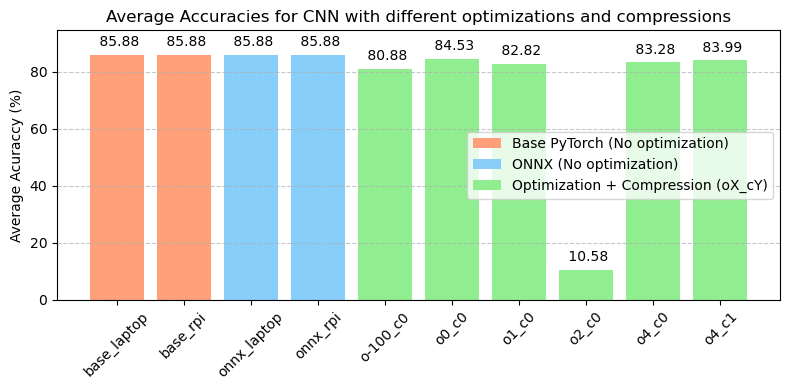

In [6]:
# Graficar los AA
aa_values = [
    85.88,
    85.88,
    85.88,
    85.88,
    80.88,
    84.53,
    82.82,
    10.58,
    83.28,
    83.99
]

plt.figure(figsize=(8, 4))
bars = plt.bar(model_names_cnn, aa_values, color=bar_colors)

# Añadimos valores encima de las barras
for bar, value in zip(bars, aa_values):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 2,
             f'{value: .2f}',
             ha='center', va='bottom', fontsize=10)

plt.ylim(top=max(aa_values) * 1.1)
plt.ylabel("Average Acuraccy (%)")
plt.title("Average Accuracies for CNN with different optimizations and compressions")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadimos leyenda y texto explicativo
plt.legend(handles = legend_elements, loc='center right', frameon=True)
plt.tight_layout()

# Guardar y mostrar la imagen
plt.savefig("../results/graphs/average_accuracies_cnn21.png")
plt.savefig("../results/graphs/average_accuracies_cnn21.pdf", dpi=300)
plt.show()

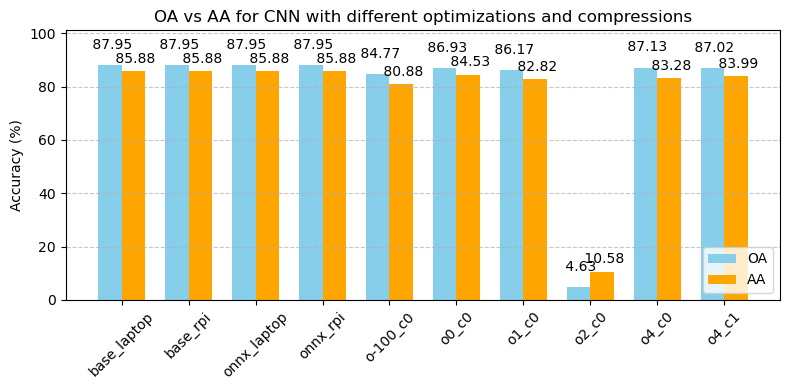

In [7]:
# Graficar los OA y los AA

# Posiciones en el eje x
x = np.arange(len(model_names_cnn))
width = 0.35 # Ancho de cada barra

plt.figure(figsize=(8, 4))

# Dibujamos las barras OA y AA con desplazamiento
bars1 = plt.bar(x - width/2, oa_values, width, label='OA', color='skyblue')
bars2 = plt.bar(x + width/2, aa_values, width, label='AA', color='orange')

# Añadimos valores encima de las barras
for bar, value in zip(bars1, oa_values):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 5,
             f'{value: .2f}',
             ha='center', va='bottom', fontsize=10)
    
for bar, value in zip(bars2, aa_values):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 2,
             f'{value: .2f}',
             ha='center', va='bottom', fontsize=10)

plt.ylim(top=max(max(oa_values), max(aa_values)) * 1.15)
plt.ylabel("Accuracy (%)")
plt.title("OA vs AA for CNN with different optimizations and compressions")
plt.xticks(x, model_names_cnn, rotation=45)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Guardar y mostrar la imagen
plt.savefig("../results/graphs/oa_vs_aa_cnn21.png")
plt.savefig("../results/graphs/oa_vs_aa_cnn21.pdf", dpi=300)
plt.show()

## 2. Generar gráficas para OA, AA y tiempo de inferencia de la ResBaGAN

In [8]:
# Datos iniciales

model_names_resbagan = [
    "base_laptop",
    "base_rpi",
    "onnx_laptop",
    "onnx_rpi",
    "o-100_c0",
    "o0_c0",
    "o1_c0",
    "o2_c0",
    "o4_c0",
    "o4_c1",
    "o4_c2",
    "o4_c3",
]

color_map = {
    "base": "#FFA07A", # Color salmón
    "onnx": "#87CEFA", # Color azul cielo
    "opt": "#90EE90" # Color verde claro
}

# Asignar colores a cada modelo según su prefijo
bar_colors = []
for name in model_names_resbagan:
    if name.startswith("base"):
        bar_colors.append(color_map["base"])
    elif name.startswith("onnx"):
        bar_colors.append(color_map["onnx"])
    else:
        bar_colors.append(color_map["opt"])
        
legend_elements = [
    Patch(facecolor=color_map["base"], label="Base PyTorch (No optimization)"),
    Patch(facecolor=color_map["onnx"], label="ONNX (No optimization)"),
    Patch(facecolor=color_map["opt"], label="Optimization + Compression (oX_cY)")
]

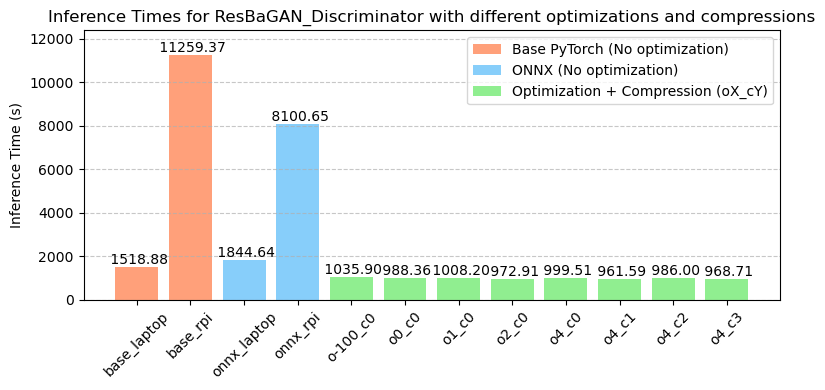

In [9]:
# Graficar los tiempos de inferencia
inference_times = [
    1518.8807,
    11259.3677,
    1844.6441,
    8100.6450,
    1035.9008,
    988.3645,
    1008.1954,
    972.9149,
    999.5060,
    961.5865,
    986.0043,
    968.7084
]

plt.figure(figsize=(8, 4))
bars = plt.bar(model_names_resbagan, inference_times, color=bar_colors)

# Añadimos valores encima de las barras
for bar, value in zip(bars, inference_times):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 2,
             f'{value: .2f}',
             ha='center', va='bottom', fontsize=10)

plt.ylim(top=max(inference_times) * 1.1)
plt.ylabel("Inference Time (s)")
plt.title("Inference Times for ResBaGAN_Discriminator with different optimizations and compressions")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadimos leyenda y texto explicativo
plt.legend(handles = legend_elements, loc='upper right', frameon=True)
plt.tight_layout()

# Guardar y mostrar la imagen
plt.savefig("../results/graphs/inference_times_resbagan_discriminator.png")
plt.savefig("../results/graphs/inference_times_resbagan_discriminator.pdf", dpi=300)
plt.show()

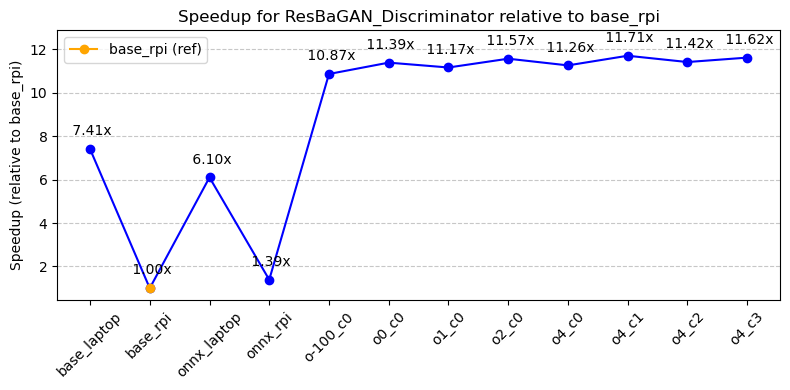

In [10]:
# Graficar el speedup
base_rpi_idx = model_names_resbagan.index("base_rpi")
base_rpi_time = inference_times[base_rpi_idx]
speedup = [base_rpi_time / t for t in inference_times]

plt.figure(figsize=(8, 4))
plt.plot(model_names_resbagan, speedup, marker='o', linestyle='-', color='blue')

# Resaltar el punto rpi_base con otro color
plt.plot(model_names_resbagan[base_rpi_idx], speedup[base_rpi_idx], marker='o', color='orange', label='base_rpi (ref)')

# Añadimos valores encima de las barras
for x, y in zip(model_names_resbagan, speedup):
    plt.text(x,
             y + 0.5,
             f'{y: .2f}x',
             ha='center', va='bottom', fontsize=10)

plt.ylim(top=max(speedup) * 1.1)
plt.ylabel("Speedup (relative to base_rpi)")
plt.title("Speedup for ResBaGAN_Discriminator relative to base_rpi")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Guardar y mostrar la imagen
plt.savefig("../results/graphs/speedup_resbagan_discriminator.png")
plt.savefig("../results/graphs/speedup_resbagan_discriminator.pdf", dpi=300)
plt.show()

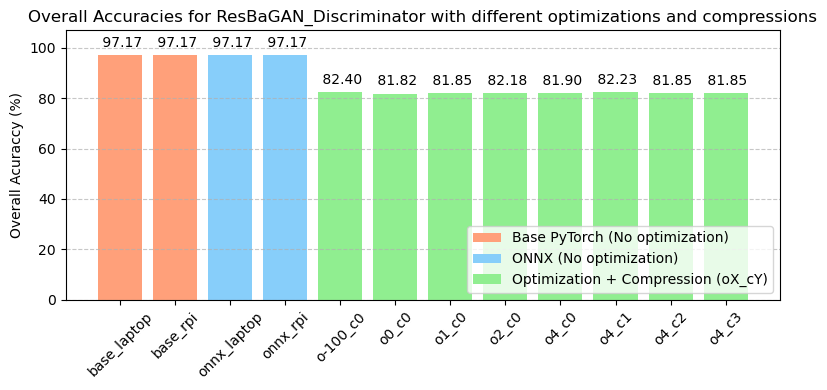

In [11]:
# Graficar los OA
oa_values = [
    97.17,
    97.17,
    97.17,
    97.17,
    82.40,
    81.82,
    81.85,
    82.18,
    81.90,
    82.23,
    81.85,
    81.85
]

plt.figure(figsize=(8, 4))
bars = plt.bar(model_names_resbagan, oa_values, color=bar_colors)

# Añadimos valores encima de las barras
for bar, value in zip(bars, oa_values):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 2,
             f'{value: .2f}',
             ha='center', va='bottom', fontsize=10)

plt.ylim(top=max(oa_values) * 1.1)
plt.ylabel("Overall Acuraccy (%)")
plt.title("Overall Accuracies for ResBaGAN_Discriminator with different optimizations and compressions")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadimos leyenda y texto explicativo
plt.legend(handles = legend_elements, loc='lower right', frameon=True)
plt.tight_layout()

# Guardar y mostrar la imagen
plt.savefig("../results/graphs/overall_accuracies_resbagan_discriminator.png")
plt.savefig("../results/graphs/overall_accuracies_resbagan_discriminator.pdf", dpi=300)
plt.show()

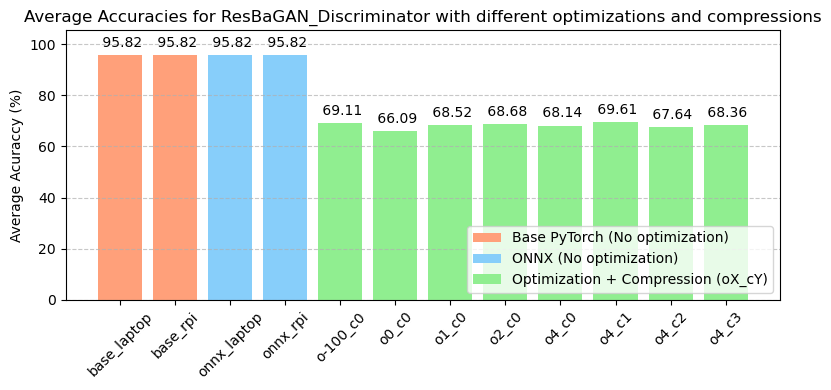

In [12]:
# Graficar los AA
aa_values = [
    95.82,
    95.82,
    95.82,
    95.82,
    69.11,
    66.09,
    68.52,
    68.68,
    68.14,
    69.61,
    67.64,
    68.36
]

plt.figure(figsize=(8, 4))
bars = plt.bar(model_names_resbagan, aa_values, color=bar_colors)

# Añadimos valores encima de las barras
for bar, value in zip(bars, aa_values):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 2,
             f'{value: .2f}',
             ha='center', va='bottom', fontsize=10)

plt.ylim(top=max(aa_values) * 1.1)
plt.ylabel("Average Acuraccy (%)")
plt.title("Average Accuracies for ResBaGAN_Discriminator with different optimizations and compressions")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadimos leyenda y texto explicativo
plt.legend(handles = legend_elements, loc='lower right', frameon=True)
plt.tight_layout()

# Guardar y mostrar la imagen
plt.savefig("../results/graphs/average_accuracies_resbagan_discriminator.png")
plt.savefig("../results/graphs/average_accuracies_resbagan_discriminator.pdf", dpi=300)
plt.show()

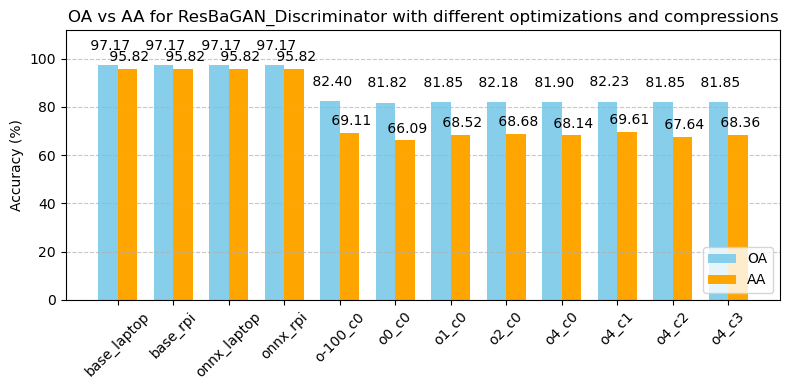

In [13]:
# Graficar los OA y los AA

# Posiciones en el eje x
x = np.arange(len(model_names_resbagan))
width = 0.35 # Ancho de cada barra

plt.figure(figsize=(8, 4))

# Dibujamos las barras OA y AA con desplazamiento
bars1 = plt.bar(x - width/2, oa_values, width, label='OA', color='skyblue')
bars2 = plt.bar(x + width/2, aa_values, width, label='AA', color='orange')

# Añadimos valores encima de las barras
for bar, value in zip(bars1, oa_values):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 5,
             f'{value: .2f}',
             ha='center', va='bottom', fontsize=10)
    
for bar, value in zip(bars2, aa_values):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 2,
             f'{value: .2f}',
             ha='center', va='bottom', fontsize=10)

plt.ylim(top=max(max(oa_values), max(aa_values)) * 1.15)
plt.ylabel("Accuracy (%)")
plt.title("OA vs AA for ResBaGAN_Discriminator with different optimizations and compressions")
plt.xticks(x, model_names_resbagan, rotation=45)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Guardar y mostrar la imagen
plt.savefig("../results/graphs/oa_vs_aa_resbagan_discriminator.png")
plt.savefig("../results/graphs/oa_vs_aa_resbagan_discriminator.pdf", dpi=300)
plt.show()